In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import os
def cm2inch(value):
    return value/2.54

plt.rc('xtick' , labelsize=14)    # fontsize of the tick labels
plt.rc('ytick' , labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize =14)    # legend fontsize
plt.rc('axes'  , titlesize=14)     # fontsize of the axes set_title
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

    
linewidth = 1

width_images  = 7.6
height_images = 7





### Figure 1: dynamics showing chirality + imbalance between right and left front to show the presence of a preferred direction

1
Max uncertainty : 0.0
100
Max uncertainty : 0.019050470502870245
100
Max uncertainty : 0.02719247741415518


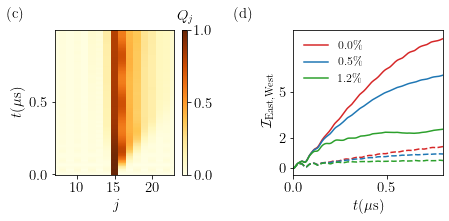

In [3]:
# path to folder containing data
data_folder = "./"
# path folder where to save plot
save_folder = "./"

import math

fontsize=13*8/7
plt.rc('xtick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize =fontsize)    # legend fontsize
plt.rc('axes'  , titlesize=fontsize)     # fontsize of the axes set_title
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

width_images  = 8
height_images = 8

ncol = 2
nrow = 1
fig , axs = plt.subplots(nrow,ncol, figsize=(cm2inch(ncol*width_images), cm2inch(nrow*height_images)),sharey=False)


# parameters
N = 30
M = 15
x_exc = M
V1 = 1.0 # ideal V1
V2 = 2 # ideal V2
D = 500
eps = 0
state = "single"
sx_list = [0,0.005,0.012]

Om1 = 0.20
Om2 = 0.00

n_realization = 100

name_obs = 'nj'

folder = f"{data_folder}{state}/"

# V_exp (V1 in experimental units, it is in MHz)
V_exp = 15 * 2 * math.pi
energy_scale = "omega" #if omega, it set omega as energy scale in the time scales. It converts to it. Otherwise, it uses $V_1$ as time and energy scale.
energy_scale = "physical"

sx_target = 0.012

colors = ['tab:red','tab:blue','tab:green']
for idx_sx , sx in enumerate(sx_list):

    sy = sx
    sz = 5*sx   

    if energy_scale == "physical":
        x = 1
        max_time = x * V_exp  # reach x mu s 
    
    # reference length - swipes all files to find the largest common time reached

    reference = 0
    
    file_prefix = f"{folder}TN_N{N}_M{M}_V1_{V1:.2f}_V2_{V2:.2f}_Om_{Om1:.3f}_D{D}_state{state}_sigmax{sx:.5f}_index"
    
    counter = 0
    for idx in range(n_realization):
        file = f"{file_prefix}{idx}_{name_obs}.txt"

        if os.path.isfile(file):
            counter += 1
            data = np.loadtxt(file)

            ts = data[:,0]
            if (len(ts) < reference or reference == 0):
                reference = len(ts)

    idx_t = False
    if reference > 0:
        O = []
        O_av = 0
        O_st = 0
        
        for idx in range(n_realization):
            file = f"{file_prefix}{idx}_{name_obs}.txt"
            if os.path.isfile(file):
                data = np.loadtxt(file)
            
                ts = data[:reference,0]
                O_single = data[:reference,1:]
                js = np.arange(1,len(O_single[0])+1)

                O += [O_single]

                idx_t = True


        if energy_scale == "physical":
            ts /= V_exp

        O_std = np.std(np.array(O),axis=0) / np.sqrt(len(O))
        O_av = np.average(np.array(O),axis=0)
        print(f'Max uncertainty : {np.amax(O_std)/np.amax(O_av)}')

        if sx == sx_target:
            js = np.arange(1,N+1)
            a = axs[0]
            pcm = a.pcolormesh(js,ts, np.real(O_av),cmap="YlOrBr")#,norm=LogNorm(vmin= 1E-2, vmax=1))
            a.set_xlabel('$j$',fontsize=fontsize)
        
    elif sx == 0:
        file = f"{file_prefix}_{name_obs}.txt"

        if os.path.isfile(file):
            data = np.loadtxt(file)
            ts = data[:,0]
            O_single = data[:,1:]
            js = np.arange(1,len(O_single[0])+1)
            idx_t  = True
            if energy_scale == "physical":
                ts /= V_exp

            O_av = O_single

    if idx_t:
        nt = O_av
        I_R = np.sum(nt[:,x_exc:],axis=1)
        I_L = np.sum(nt[:,:x_exc-1],axis=1)
        
        axs[1].plot(ts,I_R,label=f'${sx*1E2}\%$',color=colors[idx_sx])#,color='tab:red')
        axs[1].plot(ts,I_L,color=colors[idx_sx],linestyle='--')#,color='tab:red')

axs[0].set_xticks([10,15,20])
axs[0].set_xlim([7,23])
axs[0].set_yticks([0,0.5])

axs[0].set_ylabel('$t(\mu$s$)$',fontsize=fontsize)

axs[1].set_ylabel('$(\mathcal{{I}}_{{R}} - \mathcal{{I}}_{{L}})/(\mathcal{{I}}_{{R}} + \mathcal{{I}}_{{L}})$',fontsize=fontsize)
axs[1].set_ylabel('$\mathcal{{I}}_{{\\mathrm{East,West}}}$',fontsize=fontsize)
axs[1].set_xlabel('$t(\mu$s$)$',fontsize=fontsize)
axs[1].set_xticks([0,0.5])
axs[1].set_xlim([0,0.8])
axs[1].set_yticks([0,2,5])

fig.subplots_adjust(hspace=0, wspace=0.1)
cbar = fig.colorbar(pcm, ax=axs[0],aspect=25)
cbar.ax.set_title(label='$Q_j$',size=fontsize,y=1.03)
cbar.ax.set_yticks([0,0.5,1])

plt.tight_layout()
x_text = -0.4
y_text = 1.08
fig.subplots_adjust(hspace=0, wspace=0.6)

axs[0].text(x_text,y_text, f"(c)", transform=axs[0].transAxes, size=fontsize)
axs[1].text(x_text,y_text, f"(d)", transform=axs[1].transAxes, size=fontsize)
axs[1].legend(frameon=False,fontsize=12)

fig.savefig(f'{save_folder}figure_1_chiral_current_v8_sx{sx_target}.pdf',bbox_inches='tight',pad_inches = 0)
plt.show()

### Figure 2: dynamics of occupation number in shattered regime (confinement) and quantum East model regime. We perform disorder averages to say that the chiral current is robust against disorder. 

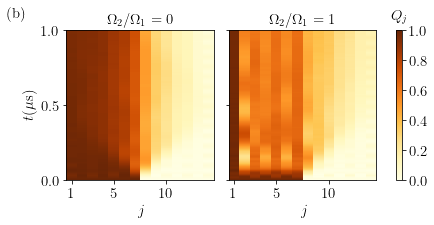

In [5]:
# path to folder containing data
data_folder = "./"
# path folder where to save plot
save_folder = "./"

import math

fontsize=13*8/7

plt.rc('xtick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize =fontsize)    # legend fontsize
plt.rc('axes'  , titlesize=fontsize)     # fontsize of the axes set_title
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

width_images  = 8
height_images = 8

ncol = 2
nrow = 1
fig , axs = plt.subplots(nrow,ncol, figsize=(cm2inch(ncol*width_images), cm2inch(nrow*height_images)),sharey=True)


state = '00100001001'
state = '11111110000000'
# parameters
V1 = 1.0 # ideal V1
V2 = 2 # ideal V2
eps = 0
sx = 0.012
sy = sx
sz = 5*sx

Omega_1 = [0.20,0.20]
Omega_2 = [0   ,0.20]


n_realization = 100

name_obs = ['timedep_n_t']

# Vexp (V1) experimental in MHz
V_exp = 15 * 2 * math.pi
energy_scale = "omega" #if omega, it set omega as energy scale in the time scales. It converts to it. Otherwise, it uses $V_1$ as time and energy scale.
energy_scale = "physical"

for idx_om, (Om1, Om2) in enumerate(zip(Omega_1,Omega_2)):


    if energy_scale == "physical":
        x = 1
        max_time = x * V_exp  # reach x mu s
    N = len(state)
    folder = f'{data_folder}{state}/ED_timedep_rydberg_L{N}_V1_{V1:.1f}_V2_{V2:.1f}_Om1_{Om1:.2f}_Om2_{Om2:.2f}_eps{eps:.3f}_sigmax{sx:.3f}_sigmay{sy:.3f}_sigmaz{sz:.3f}'
    
    O = {}
    for name in name_obs:
        O[name] = []

    if os.path.isdir(folder):
        for idx_obs , name in enumerate(name_obs):
            for idx in range(n_realization):

                file_t = f'{folder}/time.npy'
                if os.path.isfile(file_t):
                    ts = np.load(file_t)
                    
                file_t = f'{folder}/time_index{idx}.npy'
                if os.path.isfile(file_t):
                    ts = np.load(file_t)

                file_t = f'{folder}/timedep_time_index{idx}.npy'
                if os.path.isfile(file_t):
                    ts = np.load(file_t)
                

                file = f'{folder}/{name}_index{idx}.npy'
                if os.path.isfile(file):
                    o = np.load(file)
                    O[name] += [o]

            
            if energy_scale == "omega":
                ts = ts*np.abs(Om1)
                name_time = "$t\Omega$"
            else:
                name_time = "$tV_1$"
        
        if len(O[name])>0:
            O[name] = np.average(np.array(O[name]),axis=0)

            idx = np.argmax(ts>max_time)
           
            if energy_scale == "physical":
                ts /= V_exp
            
            a = axs[idx_om]
            js = np.arange(1,N+1)
            pcm = a.pcolormesh(js,ts[:idx], np.real(O[name][:idx]),cmap="YlOrBr")#,norm=LogNorm(vmin= 1E-1, vmax=1))
            a.set_title(f'$\Omega_2/\Omega_1={Om2/Om1:.0f}$',fontsize=fontsize)
            a.set_xlabel('$j$',fontsize=fontsize)
                        

for a in axs:
    a.set_xticks([1,5,10])
    a.set_yticks([0,0.5,1])

axs[0].set_ylabel('$t\Omega_1$',fontsize=fontsize)

if energy_scale == "physical":
    axs[0].set_ylabel('$t(\mu$s$)$',fontsize=fontsize)

plt.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0.1)
cbar = fig.colorbar(pcm, ax=axs.ravel().tolist(),aspect=25)
cbar.ax.set_title(label='$Q_j$',size=fontsize,y=1.03)
x_text = -0.4
y_text = 1.08
axs[0].text(x_text,y_text, f"(b)", transform=axs[0].transAxes, size=fontsize)

fig.savefig(f'{save_folder}figure_2_regimes_full_theory_v6.pdf',bbox_inches='tight',pad_inches = 0)
plt.show()

### Figure 3 v2: dynamical phase diagram without density profile at the max time reached

0.0
[0.1, 0.12000000000000001, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24000000000000002, 0.26, 0.28, 0.30000000000000004, 0.32]
0.001
[0.1, 0.12000000000000001, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24000000000000002, 0.26, 0.28, 0.30000000000000004, 0.32]
0.002
[]
0.003
[0.1, 0.12000000000000001, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24000000000000002, 0.26, 0.28, 0.30000000000000004, 0.32]
0.004
[]
0.005
[0.1, 0.12000000000000001, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24000000000000002, 0.26, 0.28, 0.30000000000000004, 0.32]
0.006
[]
0.007
[0.1, 0.12000000000000001, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24000000000000002, 0.26, 0.28, 0.30000000000000004, 0.32]
0.008
[]
0.009000000000000001
[0.1, 0.12000000000000001, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24000000000000002, 0.26, 0.28, 0.30000000000000004, 0.32]
0.01
[0.1, 0.12000000000000001, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24000000000000002, 0.26, 0.28, 0.30000000000000004, 0.32]
0.011
[0.1, 0.12000000000000001, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24000000000000002, 0.26, 0.28, 0.3

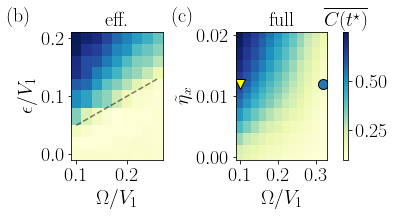

In [5]:
# path to folder containing data
data_folder = "./"
# path folder where to save plot
save_folder = "./"

fontsize=20

plt.rc('xtick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize =fontsize)    # legend fontsize
plt.rc('axes'  , titlesize=fontsize)     # fontsize of the axes set_title
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

width_images  = 8
height_images = 8

ncol = 2
nrow = 1
fig , axs = plt.subplots(nrow,ncol, figsize=(cm2inch(ncol*width_images), cm2inch(nrow*height_images)))


# parameters
V1 = 1.0 # ideal V1
V2 = 2 # ideal V2

# Rabi frequencies
Omega_list = np.array([0.10 +j * 0.02 for j in range(int(0.26/0.02))])
# Omega_list = np.array([0.10 +j * 0.02 for j in range(int(0.2/0.02))])

# detuning
eps_list = np.array([j * 0.02 for j in range(int(0.5/0.02))]+[0.012])
# eps_list = np.sort(eps_list)

eps_list = eps_list[eps_list<=0.2]

eps_target = 0.1
sx_target = 0.01
# disorders
sigma_x_list = [0.001 * j for j in range(23)]
n_realization = 100

# Omega experimental in MHz for Om_nondim_units = 0.2 (in units of V1)
Om_nondim_units = 0.2
Om_exp = 3.6

# in the ideal case, we do not need to keep track of the first excitation due to East symmetry
state_eff   =   '0010001110'
name_obs_eff  = ["C_auto_av_t"]
data_folder_eff  = f'/home/ricval/Documenti/projects_in_progress/east_rydbergs/data_new/effective_theory/ED/{state_eff}_long_time'
n0 = 1
nf = 1

state_full = '010010001110'
name_obs_full = ["timedep_C_auto_av_t"]
data_folder_full = f'/home/ricval/Documenti/projects_in_progress/east_rydbergs/data_new/non_integrable_any_regime/ED/quenched_disorder/{state_full}'

energy_scale = "omega" #if omega, it set omega as energy scale in the time scales. It converts to it. Otherwise, it uses $V_1$ as time and energy scale.

O_infty_ = []
Om_ref = []
eps_exist = []
n_t_infty = []
for idx_eps, eps in enumerate(eps_list):
    Obs_infty = []
    Om_exists = []
    for idx_Om , Om in enumerate(Omega_list):

        # max time accessible in units of Omega
        # max_time = 10 * Om_exp * (Om1/Om_nondim_units)
        N = len(state_eff)
        folder = f'{data_folder_eff}/ED_effective_theory_N{N}_n0{n0}_nf{nf}_Om1_{Om:.3f}_Om2_{Om:.3f}_V1_{V1:.2f}_V2_{V2:.2f}_eps{eps:.3f}'
        O = {}

        for name in name_obs_eff:
            O[name] = []

        if os.path.isdir(folder):

            file_t = f'{folder}/time.npy'
            if os.path.isfile(file_t):
                ts = np.load(file_t)

            if energy_scale == "omega":
                ts = ts*np.abs(Om)
                name_time = "$t\Omega$"
            else:
                name_time = "$tV_1$"
                    
            for idx_obs , name in enumerate(name_obs_eff):                
                
                file = f'{folder}/{name}.npy'
                if os.path.isfile(file):
                    o = np.load(file)
                    O[name] += [o]

                    if "C" in name:
                        Obs_infty += [o[-1]]
                        Om_exists += [Om]

                    if "n_t" in name and eps == eps_target:
                        n_t_infty += [np.append(np.array([0,1]),o[-1])]

    if len(Om_ref) == 0:
        Om_ref = Om_exists
    if Om_exists == Om_ref:
        O_infty_.append(Obs_infty)
        eps_exist.append(eps)

a = axs[0]
pcm = a.pcolormesh(Om_ref, eps_exist, O_infty_,cmap="YlGnBu")

a.set_ylabel('$\epsilon/V_1$',fontsize=fontsize)
a.set_xlabel('$\Omega  /V_1$',fontsize=fontsize)
a.set_title('eff.',fontsize=fontsize)
a.plot(Om_ref,np.array(Om_ref)/2,linestyle='--',color='black',alpha=0.5)
# a.plot([Om_ref[0],Om_ref[-1]],[eps_target,eps_target],linestyle='-',linewidth=2,color='black')

O_infty_ = []
Om_ref = []
sigma_exists = []
n_t_infty = []
n_realization = 100
eps = 0
for idx_sigma, sx in enumerate(sigma_x_list):
    Obs_infty = []
    Om_exists = []

    sy = sx
    sz = 5 * sx

    for idx_Om , Om1 in enumerate(Omega_list):
        Om2 = Om1

        max_time = 10 * Om_exp * (Om1/Om_nondim_units)
        
        N = len(state_full)
        folder = f'{data_folder_full}/ED_timedep_rydberg_L{N}_V1_{V1:.2f}_V2_{V2:.2f}_Om1_{Om1:.3f}_Om2_{Om2:.3f}_eps{eps:.3f}_sigmax{sx:.3f}_sigmay{sy:.3f}_sigmaz{sz:.3f}'
                                    #   ED_timedep_rydberg_L{L}_V1_{V1:.2f}_V2_{V2:.2f}_Om1_{Om1:.3f}_Om2_{Om2:.3f}_eps{eps:.3f}_sigmax{sx:.3f}_sigmay{sy:.3f}_sigmaz{sz:.3f}
        O = {}
        for name in name_obs_full:
            O[name] = []

        if os.path.isdir(folder):
            for idx_obs , name in enumerate(name_obs_full):
                for idx in range(n_realization):

                    file_t = f'{folder}/time.npy'
                    if os.path.isfile(file_t):
                        ts = np.load(file_t)
                        
                    file_t = f'{folder}/time_index{idx}.npy'
                    if os.path.isfile(file_t):
                        ts = np.load(file_t)

                    file_t = f'{folder}/timedep_time_index{idx}.npy'
                    if os.path.isfile(file_t):
                        ts = np.load(file_t)
                    

                    file = f'{folder}/{name}_index{idx}.npy'
                    if os.path.isfile(file):
                        o = np.load(file)
                        O[name] += [o]

                
                if energy_scale == "omega":
                    ts = ts*np.abs(Om1)
                    name_time = "$t\Omega$"
                else:
                    name_time = "$tV_1$"

                if len(O[name])>0:
                    O[name] = np.average(np.array(O[name]),axis=0)
                    if 'C_auto' in name:
                        # getting indices for which time is less than the accessible one in experiments
                        idx = np.argmax(ts>max_time)
                        Obs_infty += [O[name][idx]]
                        Om_exists += [Om1]

                    if "n_t" in name and sx == sx_target:
                        idx = np.argmax(ts>max_time)
                        n_t_infty += [O[name][idx]]


    if len(Om_ref) == 0:
        Om_ref = Om_exists
    if Om_exists == Om_ref:
        O_infty_.append(Obs_infty)
        sigma_exists.append(sx)

    print(sx)        
    print(Om_exists)


a = axs[1]

pcm = a.pcolormesh(Om_ref, sigma_exists, O_infty_,cmap="YlGnBu")
a.set_ylabel('$\\tilde{{\eta}}_x$',fontsize=fontsize)
a.set_xlabel('$\Omega/V_1$',fontsize=fontsize)
# a.set_title('full ($T \\neq 0$)',fontsize=fontsize)
a.set_title('full',fontsize=fontsize)

# a.plot([Om_ref[0],Om_ref[-1]],[sx_target,sx_target],linestyle='-',linewidth=2,color='black')


list_label = ["(b)","(c)"]
x_text = -0.7
y_text = 1.08

for idx in range(2):
    axs[idx].text(x_text,y_text, f"{list_label[idx]}", transform=axs[idx].transAxes, size=fontsize)


plt.tight_layout()
fig.subplots_adjust(hspace=0.85, wspace=0.8)
cbar = fig.colorbar(pcm, ax=axs.ravel().tolist(),aspect=25)
cbar.ax.set_title(label='$\overline{{C(t^\star)}}$',size=fontsize)



symbol = ['v','o','^','D']
color = ['yellow','tab:blue']

axs[1].plot([0.1],[0.012],marker=symbol[0],color=color[0],markeredgecolor='black',zorder=2,markersize=10)
axs[1].plot([0.32],[0.012],marker=symbol[1],color=color[1],markeredgecolor='black',zorder=2,markersize=10)

fig.savefig(f'{save_folder}autocorrelation_canEastModel_phase_diagram_state{state_full}_with_nj_v5.pdf',bbox_inches='tight',pad_inches = 0)
plt.show()

### Figure 3: dynamics in the delocalized and localized phase in the full theory with disorder. The aim is to show the dynamics in the two regimes. Then, in order to have a broader view we define an order parameter

10.005238210045782
10.00523821004578


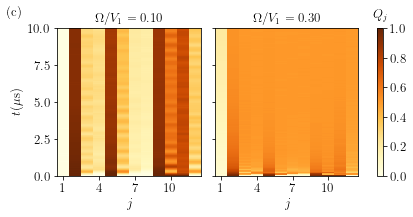

In [8]:
import math
fontsize=13*8/7
fontsize=13

plt.rc('xtick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize =fontsize)    # legend fontsize
plt.rc('axes'  , titlesize=fontsize)     # fontsize of the axes set_title
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

width_images  = 8
height_images = 8

ncol = 2
nrow = 1
fig , axs = plt.subplots(nrow,ncol, figsize=(cm2inch(ncol*width_images), cm2inch(nrow*height_images)),sharey=True)

save_folder = '/home/ricval/Documenti/projects_in_review/east_rydbergs/paper_final/PRL_v3/all'

# save_folder = '/home/ricval/Documenti/projects_in_progress/east_rydbergs/figures_talk'
# save_folder = "/home/ricval/Documenti/Applications/Slides/figures"
state = '010010001110'
name_obs = ["timedep_n_t"]
data_folder = f'/home/ricval/Documenti/projects_in_review/east_rydbergs/data_new/non_integrable_any_regime/ED/quenched_disorder_2/{state}'


# parameters
V1 = 1.0 # ideal V1
V2 = 2 # ideal V2
eps = 0
sx = 0.012
sy = sx
sz = 5*sx

Omega_1 = [0.10,0.28]
Omega_2 = [0.10,0.28]

Omega_1 = [0.10,0.30]
Omega_2 = [0.10,0.30]

n_realization = 100

name_obs = ['timedep_n_t']

# Vexp (V1) experimental in MHz
V_exp = 15 * 2 * math.pi

energy_scale = "physical"
min_time = 1E6

symbol = ['v','o','^','D']
color = ['yellow','tab:blue']

for idx_om, (Om1, Om2) in enumerate(zip(Omega_1,Omega_2)):

    # max time accessible in units of Omega
    max_time = 10 * V_exp
    N = len(state)
    folder = f'{data_folder}/ED_timedep_rydberg_L{N}_V1_{V1:.2f}_V2_{V2:.2f}_Om1_{Om1:.3f}_Om2_{Om2:.3f}_eps{eps:.3f}_sigmax{sx:.3f}_sigmay{sy:.3f}_sigmaz{sz:.3f}'

    O = {}
    for name in name_obs:
        O[name] = []


    if os.path.isdir(folder):
        for idx_obs , name in enumerate(name_obs):
            for idx in range(n_realization):

                file_t = f'{folder}/time.npy'
                if os.path.isfile(file_t):
                    ts = np.load(file_t)
                    
                file_t = f'{folder}/time_index{idx}.npy'
                if os.path.isfile(file_t):
                    ts = np.load(file_t)

                file_t = f'{folder}/timedep_time_index{idx}.npy'
                if os.path.isfile(file_t):
                    ts = np.load(file_t)
                

                file = f'{folder}/{name}_index{idx}.npy'
                if os.path.isfile(file):
                    o = np.load(file)
                    O[name] += [o]

            
            if energy_scale == "omega":
                ts = ts*np.abs(Om1)
                name_time = "$t\Omega$"
            else:
                name_time = "$tV_1$"
        
        if len(O[name])>0:
            O[name] = np.average(np.array(O[name]),axis=0)

            idx = np.argmax(ts>max_time)
            if idx == 0:
                idx = -1

            
            a = axs[idx_om]
            js = np.arange(1,N+1)
            
            if energy_scale == "physical":
                ts /= V_exp
            
            pcm = a.pcolormesh(js,ts[:idx], np.real(O[name][:idx]),cmap="YlOrBr") # YlGnBu

            a.set_title(f'$\Omega/V_1={Om1:.2f}$',fontsize=fontsize)
            a.set_xlabel('$j$',fontsize=fontsize)

            if min_time > ts[idx]:
                min_time = ts[idx]
                print(min_time)

            a.plot([10.5],[ts[idx]-2/min_time*ts[idx]],marker=symbol[idx_om],color=color[idx_om],markeredgecolor='black',zorder=2,markersize=10)

                        

for a in axs:
    a.set_xticks([1,4,7,10])


list_label = "(c)"
x_text = -0.35
y_text = 1.08

axs[0].text(x_text,y_text, f"{list_label}", transform=axs[0].transAxes, size=fontsize)

axs[0].set_ylabel('$t(\mu$s$)$',fontsize=fontsize)

# axs[0].set_title("$\Omega/2<1$")
# axs[1].set_title("$\Omega/2>1$")


plt.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0.1)
cbar = fig.colorbar(pcm, ax=axs.ravel().tolist(),aspect=25)
cbar.ax.set_title(label='$Q_j$',size=fontsize,y=1.03)

fig.savefig(f'{save_folder}/figure_3_qEastModel_loc_deloc_full_theory_v10_3.pdf',bbox_inches='tight',pad_inches = 0)
# fig.savefig(f'{save_folder}/dynamics_loc_deloc.png',dpi=1000,bbox_inches='tight',pad_inches = 0)

plt.show()

### Fig 3 - possible idea: instead of showing effective theory phase diagram as we swipe $\epsilon$ and $\Omega$, we show the effective phase diagram of the full theory at fixed disorder $\eta=0.012$ (given by the experimental scenario).
### As expected, $\epsilon$ does not play a major role. It is mostly due already to disorder the localization. 

[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38]


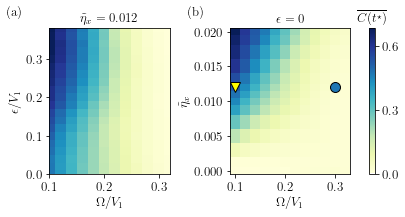

In [5]:
fontsize=13

plt.rc('xtick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize =fontsize)    # legend fontsize
plt.rc('axes'  , titlesize=fontsize)     # fontsize of the axes set_title
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

width_images  = 8
height_images = 8
ncol = 2
nrow = 1
fig , axs = plt.subplots(nrow,ncol, figsize=(cm2inch(ncol*width_images), cm2inch(nrow*height_images)))
save_folder = '/home/ricval/Documenti/projects_in_progress/east_rydbergs/paper_sync/figures'


# parameters
V1 = 1.0 # ideal V1
V2 = 2 # ideal V2

# Rabi frequencies
Omega_list = np.array([0.10 +j * 0.02 for j in range(int(0.26/0.02))])

# detuning
eps_list = np.array([j * 0.02 for j in range(int(0.4/0.02)+1)])

eps_target = 0.1
sx_target = 0.012

# disorders
sigma_x_list = [0.001 * j for j in range(23)]
n_realization = 100

# V1 experimental in MHz 
V_exp = 15 * 2 * math.pi


state_full = '010010001110'
name_obs_full = ["timedep_C_auto_av_t"]
data_folder_full = f'/home/ricval/Documenti/projects_in_progress/east_rydbergs/data_new/non_integrable_any_regime/ED/quenched_disorder_2/{state_full}'



energy_scale = "V1" #if omega, it set omega as energy scale in the time scales. It converts to it. Otherwise, it uses $V_1$ as time and energy scale.

O_infty_ = []
Om_ref = []
eps_exist = []
n_t_infty = []

sx_ref = 0.012
sy_ref = sx_ref
sz_ref = 5 * sx_ref
for idx_eps, eps in enumerate(eps_list):
    # print(eps)
    Obs_infty = []
    Om_exists = []
    for idx_Om , Om in enumerate(Omega_list):

        # max_time = 10 * Om_exp * (Om/Om_nondim_units)
        max_time = 10 * V_exp

        N = len(state_full)
        folder = f'{data_folder_full}/ED_timedep_rydberg_L{N}_V1_{V1:.2f}_V2_{V2:.2f}_Om1_{Om:.3f}_Om2_{Om:.3f}_eps{eps:.3f}_sigmax{sx_ref:.3f}_sigmay{sy_ref:.3f}_sigmaz{sz_ref:.3f}'
        O = {}
        for name in name_obs_full:
            O[name] = []

        if os.path.isdir(folder):
            for idx_obs , name in enumerate(name_obs_full):
                for idx in range(n_realization):

                    file_t = f'{folder}/time.npy'
                    if os.path.isfile(file_t):
                        ts = np.load(file_t)
                        
                    file_t = f'{folder}/time_index{idx}.npy'
                    if os.path.isfile(file_t):
                        ts = np.load(file_t)

                    file_t = f'{folder}/timedep_time_index{idx}.npy'
                    if os.path.isfile(file_t):
                        ts = np.load(file_t)
                    

                    file = f'{folder}/{name}_index{idx}.npy'
                    if os.path.isfile(file):
                        o = np.load(file)
                        O[name] += [o]

                
                if energy_scale == "omega":
                    ts = ts*np.abs(Om)
                    name_time = "$t\Omega$"
                else:
                    name_time = "$tV_1$"
                if len(O[name])>0:

                    O[name] = np.average(np.array(O[name]),axis=0)
                    if 'C_auto' in name:
                        # getting indices for which time is less than the accessible one in experiments
                        idx = np.argmax(ts>max_time)
                        Obs_infty += [O[name][idx]]
                        Om_exists += [Om]
     
                    if "n_t" in name and sx == sx_target:
                        idx = np.argmax(ts>max_time)
                        n_t_infty += [O[name][idx]]


    if len(Om_ref) == 0 and len(Om_exists) > 0:
        Om_ref = Om_exists
    if Om_exists == Om_ref and len(Om_ref) > 0:
        O_infty_.append(Obs_infty)
        eps_exist.append(eps)

print(eps_exist)

a = axs[0]
pcm = a.pcolormesh(Om_ref, eps_exist, O_infty_,cmap="YlGnBu")

a.set_ylabel('$\epsilon/V_1$',fontsize=fontsize)
a.set_xlabel('$\Omega  /V_1$',fontsize=fontsize)
a.set_title('$\\tilde{\eta}_x=0.012$',fontsize=fontsize)
a.set_xlim([Om_ref[0],Om_ref[-1]])
a.set_ylim([eps_exist[0],eps_exist[-1]])


O_infty_ = []
Om_ref = []
sigma_exists = []
n_t_infty = []
n_realization = 100
eps = 0


for idx_sigma, sx in enumerate(sigma_x_list):
    Obs_infty = []
    Om_exists = []

    sy = sx
    sz = 5 * sx

    for idx_Om , Om1 in enumerate(Omega_list):
        Om2 = Om1

        max_time = 10 * V_exp
        
        N = len(state_full)
        folder = f'{data_folder_full}/ED_timedep_rydberg_L{N}_V1_{V1:.2f}_V2_{V2:.2f}_Om1_{Om1:.3f}_Om2_{Om2:.3f}_eps{eps:.3f}_sigmax{sx:.3f}_sigmay{sy:.3f}_sigmaz{sz:.3f}'
         
                                    #   ED_timedep_rydberg_L{L}_V1_{V1:.2f}_V2_{V2:.2f}_Om1_{Om1:.3f}_Om2_{Om2:.3f}_eps{eps:.3f}_sigmax{sx:.3f}_sigmay{sy:.3f}_sigmaz{sz:.3f}
        O = {}
        for name in name_obs_full:
            O[name] = []

        if os.path.isdir(folder):
            for idx_obs , name in enumerate(name_obs_full):
                for idx in range(n_realization):

                    file_t = f'{folder}/time.npy'
                    if os.path.isfile(file_t):
                        ts = np.load(file_t)
                        
                    file_t = f'{folder}/time_index{idx}.npy'
                    if os.path.isfile(file_t):
                        ts = np.load(file_t)

                    file_t = f'{folder}/timedep_time_index{idx}.npy'
                    if os.path.isfile(file_t):
                        ts = np.load(file_t)
                    

                    file = f'{folder}/{name}_index{idx}.npy'
                    if os.path.isfile(file):
                        o = np.load(file)
                        O[name] += [o]

                
                if energy_scale == "omega":
                    ts = ts*np.abs(Om1)
                    name_time = "$t\Omega$"
                else:
                    name_time = "$tV_1$"

                if len(O[name])>0:
                    O[name] = np.average(np.array(O[name]),axis=0)
                    if 'C_auto' in name:
                        # getting indices for which time is less than the accessible one in experiments
                        idx = np.argmax(ts>max_time)
                        idx = -1
                        Obs_infty += [O[name][idx]]
                        Om_exists += [Om1]

                    if "n_t" in name and sx == sx_target:
                        idx = np.argmax(ts>max_time)
                        n_t_infty += [O[name][idx]]


    if len(Om_ref) == 0:
        Om_ref = Om_exists
    if Om_exists == Om_ref:
        O_infty_.append(Obs_infty)
        sigma_exists.append(sx)

    # print(sx)        
    # print(Om_exists)


a = axs[1]

pcm = a.pcolormesh(Om_ref, sigma_exists, O_infty_,cmap="YlGnBu")
a.set_ylabel('$\\tilde{{\eta}}_x$',fontsize=fontsize)
a.set_xlabel('$\Omega/V_1$',fontsize=fontsize)
a.set_title('$\epsilon=0$',fontsize=fontsize)



list_label = ["(a)","(b)"]
x_text = -0.35
y_text = 1.08
    
for idx in range(2):
    axs[idx].text(x_text,y_text, f"{list_label[idx]}", transform=axs[idx].transAxes, size=fontsize)
plt.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0.5)
cbar = fig.colorbar(pcm, ax=axs.ravel().tolist(),aspect=25)
cbar.ax.set_title(label='$\overline{{C(t^\star)}}$',size=fontsize)
cbar.ax.set_yticks([0,0.3,0.6])


symbol = ['v','o','^','D']
color = ['yellow','tab:blue']

axs[1].plot([0.1],[0.012],marker=symbol[0],color=color[0],markeredgecolor='black',zorder=2,markersize=10)
axs[1].plot([0.3],[0.012],marker=symbol[1],color=color[1],markeredgecolor='black',zorder=2,markersize=10)

# fig.savefig(f'{save_folder}/autocorrelation_canEastModel_phase_diagram_state{state_full}_v9_2.pdf',bbox_inches='tight',pad_inches = 0)
plt.show()

### Supplemental material - Rate equations

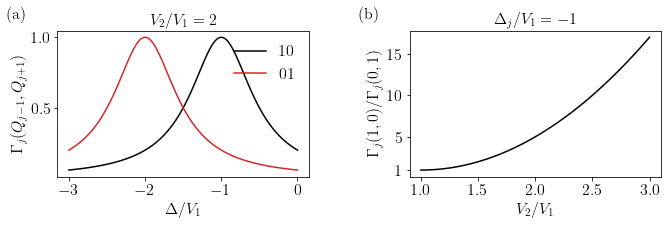

In [2]:
fontsize=16

plt.rc('xtick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize =fontsize)    # legend fontsize
plt.rc('axes'  , titlesize=fontsize)     # fontsize of the axes set_title
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

width_images  = 12
height_images = 8
ncol = 2
nrow = 1
fig , axs = plt.subplots(nrow,ncol, figsize=(cm2inch(ncol*width_images), cm2inch(nrow*height_images)))
# fig , axs = plt.subplots(nrow,ncol, figsize=(cm2inch(ncol*width_images), cm2inch(nrow*height_images*0.8)),gridspec_kw={'height_ratios': [1.45, 1]})
save_folder = '/home/ricval/Documenti/projects_in_progress/east_rydbergs/paper_sync/figures'


Delta = np.linspace(-3,0,num=100)


ax = axs[0]
V1 = 1
V2 = 2
Gamma_00 = 1 + 4 * Delta**2
Gamma_00 = 1/Gamma_00

Gamma_10 = 1 + 4 * (Delta + V1)**2
Gamma_10 = 1/Gamma_10

Gamma_01 = 1 + 4 * (Delta + V2)**2
Gamma_01 = 1/Gamma_01

Gamma_11 = 1 + 4 * (Delta + V1 + V2)**2
Gamma_11 = 1/Gamma_11


# ax.plot(Delta,Gamma_00,label="$00$")
ax.plot(Delta,Gamma_10,label="$10$",color='black')
ax.plot(Delta,Gamma_01,label="$01$",color='tab:red')
# ax.plot(Delta,Gamma_11,label="$11$")

ax.legend(frameon=False)

ax.set_xlabel("$\Delta/V_1$",fontsize=fontsize)
ax.set_ylabel("$\Gamma_j(Q_{{j-1}},Q_{{j+1}})$",fontsize=fontsize)
ax.set_title("$V_2/V_1=2$",fontsize=fontsize)

ax.set_xticks([-3,-2,-1,0])

# rate ratio as a function of V_2
ax = axs[1]
Delta = -1
V1 = 1
V2 = np.linspace(1,3)

Gamma_10 = 1 + 4 * (Delta + V1)**2
Gamma_10 = 1/Gamma_10

Gamma_01 = 1 + 4 * (Delta + V2)**2
Gamma_01 = 1/Gamma_01

ax.plot(V2,Gamma_10/Gamma_01,color='black')
ax.set_yticks([1,5,10,15])
ax.set_ylabel("$\Gamma_j(1,0)/\Gamma_j(0,1)$",fontsize=fontsize)
ax.set_xlabel("$V_2/V_1$",fontsize=fontsize)
ax.set_title("$\Delta_j/V_1=-1$")
plt.tight_layout()

fig.subplots_adjust(hspace=0, wspace=0.4)

list_label = ["(a)","(b)"]

x_text = -0.2
y_text = 1.08

for idx in range(2):
    axs[idx].text(x_text,y_text, f"{list_label[idx]}", transform=axs[idx].transAxes, size=fontsize)

# save_folder = "/home/ricval/Documenti/projects_in_progress/east_rydbergs/paper_final/650a9a38031ab76190383cad/JM_Rydbergs_East"
save_folder = "/home/ricval/Documenti/projects_in_review/east_rydbergs/paper_final/PRL_v3/all"

fig.savefig(f'{save_folder}/supmat_classical_rates_v2.pdf',bbox_inches='tight',pad_inches = 0)



### SM: Amplitudes, spectrum of occupation number as a function of disorder 

### As above, comparing: effective theory wo disorder; complete theory wo disorder; complete theory with disorder. Main message is: ideally, we would have this, due to timescales accessible in the experiments and need to overcome disorder we have to push and other effects appear, which are solely due to technological limitations, not to the intrinsic proposals. 

### Bloch oscillations - effective vs full theory

100
Max uncertainty : 0.021597923876780188


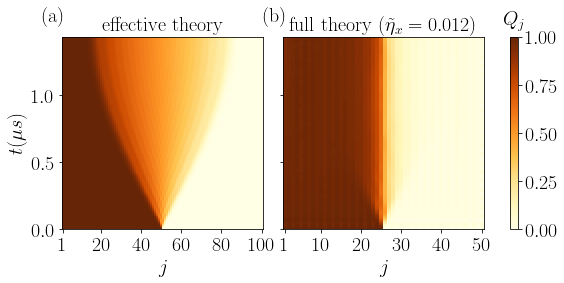

In [10]:
import math

fontsize=20

plt.rc('xtick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize =fontsize)    # legend fontsize
plt.rc('axes'  , titlesize=fontsize)     # fontsize of the axes set_title
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

width_images  = 12
height_images = 9
ncol = 2
nrow = 1
fig , axs = plt.subplots(nrow,ncol, figsize=(cm2inch(ncol*width_images), cm2inch(nrow*height_images)),sharey=True)

N = 50 # system size
M = 25 # number of excitations
Neff = 100
Meff = 50
Om1 = 0.2 # Rabi frequency in units of V1
V1 = 1  # energy scale
V2 = 2
D = 200
n_realization = 100
state = "kink" 

# uncertainty atom position with respect to minimum of the well
sx = 0.012

# Vexp (V1) experimental in MHz
V_exp = 15 * 2 * math.pi

folder_full = "/home/ricval/Documenti/projects_in_review/east_rydbergs/data_new/non_integrable_NXP/TN/quenched_disorder"
folder_full = f"{folder_full}/{state}/"
file_prefix = f"{folder_full}TN_N{N}_M{M}_V1_{V1:.2f}_V2_{V2:.2f}_Om_{Om1:.3f}_D{D}_state{state}_sigmax{sx:.5f}_index"
folder_eff = f"/home/ricval/Documenti/projects_in_review/east_rydbergs/data_paper/figure_2_integrable/integrable_fragmented_regime_N{Neff}_M{Meff}_VNNN0.022"
save_folder = "/home/ricval/Documenti/projects_in_review/east_rydbergs/paper_final/sync/JM_Rydbergs_East"
save_folder = "/home/ricval/Documenti/projects_in_review/east_rydbergs/paper_final/PRL_v3/all"
# list_obs = ['I_t','n_west_t','n_kink_t','F_t','n_t']
name_full = "nj"
name_eff = "n_t"

# FULL THEORY - WITH DISORDER
tmin = -1
reference = 0

# compute reference length
counter = 0
for idx in range(n_realization):
    file = f"{file_prefix}{idx}_{name_full}.txt"
    if os.path.isfile(file):
        counter += 1
        data = np.loadtxt(file)
        ts = data[:,0]
        if (len(ts) < reference or reference == 0):
            reference = len(ts)
print(counter)
if reference > 0:
    O = []
    O_av = 0
    O_st = 0
    for idx in range(n_realization):
        file = f"{file_prefix}{idx}_{name_full}.txt"

        if os.path.isfile(file):
            data = np.loadtxt(file)
        
            ts = data[:reference,0]
            O_single = data[:reference,1:]
            js = np.arange(1,len(O_single[0])+1)

            O += [O_single]
            if ts[-1] < tmin or tmin < 0:
                tmin = ts[-1]

    O_std = np.std(np.array(O),axis=0) / np.sqrt(len(O))
    O_av = np.average(np.array(O),axis=0)

    a = axs[1]

    pcm = a.pcolormesh(js, ts/V_exp, np.real(O_av),cmap="YlOrBr")

    a.set_title(f'full theory ($\\tilde{{\eta}}_x={sx:.3f}$)',fontsize=fontsize)
    a.set_xlabel('$j$',fontsize=fontsize)
    a.set_xticks([1,10,20,30,40,50])
   
    print(f'Max uncertainty : {np.amax(O_std)/np.amax(O_av)}')


# effective theory
    
file_t = f"{folder_eff}/time.npy"


if os.path.isfile(file_t):
    ts = np.load(file_t)
    if ts[-1] < tmin or tmin < 0:
        tmin = ts[-1]

file = f"{folder_eff}/{name_eff}.npy"
if os.path.isfile(file):
    O = np.load(file)

    a = axs[0]
    js = np.arange(1,len(O[0])+1)
    pcm = a.pcolormesh(js, ts/V_exp, O,cmap="YlOrBr")#,shading='gouraud')#,norm=LogNorm(vmin= 1E-12, vmax=np.amax(n_t)))
    
    a.set_title(f'effective theory',fontsize=fontsize)

    a.set_xlabel('$j$',fontsize=fontsize)
    a.set_ylabel('$t(\mu s)$',fontsize=fontsize)
    a.set_xticks([1,20,40,60,80,100])

            

for a in axs:
    a.set_ylim([0,tmin/V_exp])

# fig.suptitle('$\Omega_2/\Omega_1=0$',fontsize=fontsize,x=0.45)
# plt.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0.1)
cbar = fig.colorbar(pcm, ax=axs.ravel().tolist(),aspect=25)
cbar.ax.set_title(label='$Q_j$',size=fontsize,y=1.03)
x_text = -0.1
y_text = 1.08
axs[0].text(x_text,y_text, f"(a)", transform=axs[0].transAxes, size=fontsize)

x_text = 1
y_text = 1.08
axs[1].text(x_text,y_text, f"(b)", transform=axs[0].transAxes, size=fontsize)
fig.savefig(f'{save_folder}/SM_Bloch_oscillations_nj_v2.pdf',bbox_inches='tight',pad_inches = 0)
plt.show()

### Bloch oscillations - entanglement entropy

100
Max uncertainty : 0.043972761275708386


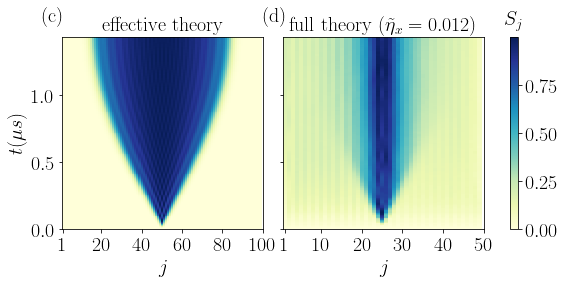

In [64]:
import math

fontsize=20

plt.rc('xtick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize =fontsize)    # legend fontsize
plt.rc('axes'  , titlesize=fontsize)     # fontsize of the axes set_title
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

width_images  = 12
height_images = 9
ncol = 2
nrow = 1
fig , axs = plt.subplots(nrow,ncol, figsize=(cm2inch(ncol*width_images), cm2inch(nrow*height_images)),sharey=True)

N = 50 # system size
M = 25 # number of excitations
Neff = 100
Meff = 50
Om1 = 0.2 # Rabi frequency in units of V1
V1 = 1  # energy scale
V2 = 2
D = 200
n_realization = 100
state = "kink" 

# uncertainty atom position with respect to minimum of the well
sx = 0.012

# Vexp (V1) experimental in MHz
V_exp = 15 * 2 * math.pi

folder_full = "/home/ricval/Documenti/projects_in_review/east_rydbergs/data_new/non_integrable_NXP/TN/quenched_disorder"
folder_full = f"{folder_full}/{state}/"
file_prefix = f"{folder_full}TN_N{N}_M{M}_V1_{V1:.2f}_V2_{V2:.2f}_Om_{Om1:.3f}_D{D}_state{state}_sigmax{sx:.5f}_index"
folder_eff = f"/home/ricval/Documenti/projects_in_review/east_rydbergs/data_paper/figure_2_integrable/integrable_fragmented_regime_N{Neff}_M{Meff}_VNNN0.022"
save_folder = "/home/ricval/Documenti/projects_in_review/east_rydbergs/paper_final/sync/JM_Rydbergs_East"
# list_obs = ['I_t','n_west_t','n_kink_t','F_t','n_t']
name_full = "entanglement"
name_eff = "ent_t"

# FULL THEORY - WITH DISORDER
tmin = -1
reference = 0

# compute reference length
counter = 0
for idx in range(n_realization):
    file = f"{file_prefix}{idx}_{name_full}.txt"
    if os.path.isfile(file):
        counter += 1
        data = np.loadtxt(file)
        ts = data[:,0]
        if (len(ts) < reference or reference == 0):
            reference = len(ts)
print(counter)
if reference > 0:
    O = []
    O_av = 0
    O_st = 0
    for idx in range(n_realization):
        file = f"{file_prefix}{idx}_{name_full}.txt"

        if os.path.isfile(file):
            data = np.loadtxt(file)
        
            ts = data[:reference,0]
            O_single = data[:reference,1:]
            js = np.arange(1,len(O_single[0])+1)

            O += [O_single]
            if ts[-1] < tmin or tmin < 0:
                tmin = ts[-1]

    O_std = np.std(np.array(O),axis=0) / np.sqrt(len(O))
    O_av = np.average(np.array(O),axis=0)

    a = axs[1]

    pcm = a.pcolormesh(js, ts/V_exp, np.real(O_av),cmap="YlGnBu")

    a.set_title(f'full theory ($\\tilde{{\eta}}_x={sx:.3f}$)',fontsize=fontsize)
    a.set_xlabel('$j$',fontsize=fontsize)
    a.set_xticks([1,10,20,30,40,50])
   
    print(f'Max uncertainty : {np.amax(O_std)/np.amax(O_av)}')


# effective theory
    
file_t = f"{folder_eff}/time.npy"


if os.path.isfile(file_t):
    ts = np.load(file_t)
    if ts[-1] < tmin or tmin < 0:
        tmin = ts[-1]

file = f"{folder_eff}/{name_eff}.npy"
if os.path.isfile(file):
    O = np.load(file)

    a = axs[0]
    js = np.arange(1,len(O[0])+1)
    pcm = a.pcolormesh(js, ts/V_exp, O,cmap="YlGnBu")#,shading='gouraud')#,norm=LogNorm(vmin= 1E-12, vmax=np.amax(n_t)))
    
    a.set_title(f'effective theory',fontsize=fontsize)

    a.set_xlabel('$j$',fontsize=fontsize)
    a.set_ylabel('$t(\mu s)$',fontsize=fontsize)
    a.set_xticks([1,20,40,60,80,100])

            

for a in axs:
    a.set_ylim([0,tmin/V_exp])

# fig.suptitle('$\Omega_2/\Omega_1=0$',fontsize=fontsize,x=0.45)
# plt.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0.1)
cbar = fig.colorbar(pcm, ax=axs.ravel().tolist(),aspect=25)
cbar.ax.set_title(label='$S_j$',size=fontsize,y=1.03)
x_text = -0.1
y_text = 1.08
axs[0].text(x_text,y_text, f"(c)", transform=axs[0].transAxes, size=fontsize)

x_text = 1
y_text = 1.08
axs[1].text(x_text,y_text, f"(d)", transform=axs[0].transAxes, size=fontsize)
fig.savefig(f'{save_folder}/SM_Bloch_oscillations_Sj.pdf',bbox_inches='tight',pad_inches = 0)
plt.show()

### East model - oscillations

/home/ricval/Documenti/projects_in_review/east_rydbergs/data_new/non_integrable_NX/ED/quenched_disorder/0010000000/ED_timedep_rydberg_L10_V1_1.0_V2_2.0_Om1_0.20_Om2_0.20_eps0.000_sigmax0.012_sigmay0.012_sigmaz0.060
100
Max uncertainty : 0.022472562502395058


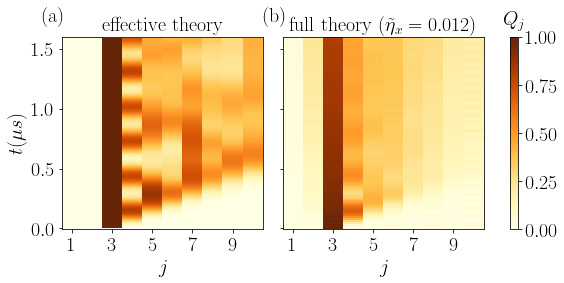

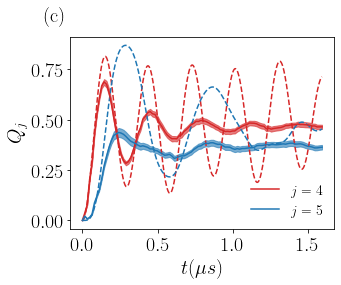

In [11]:
import math

fontsize=20

plt.rc('xtick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick' , labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize =fontsize)    # legend fontsize
plt.rc('axes'  , titlesize=fontsize)     # fontsize of the axes set_title
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

width_images  = 12
height_images = 9
ncol = 2
nrow = 1
fig  , axs  = plt.subplots(nrow,ncol, figsize=(cm2inch(ncol*width_images), cm2inch(nrow*height_images)),sharey=True)
fig2 , axs2 = plt.subplots(1,1, figsize=(cm2inch(width_images), cm2inch(height_images)))
# parameters
V1 = 1.0 # ideal V1
V2 = 2.0 # ideal V2
eps = 0
# Vexp (V1) experimental in MHz
V_exp = 15 * 2 * math.pi

n_realization = 100

# QX model
Om1 = 0.20
Om2 = 0.20
name_obs = 'timedep_n_t'
name_time = 'timedep_time'
type_simulation = 'ED_timedep'
state = "0010000000"
x_exc = state.index('1')
sx_list = [0.012]
folder_full = "/home/ricval/Documenti/projects_in_review/east_rydbergs/data_new/non_integrable_NX/ED/quenched_disorder"
folder_eff  = "/home/ricval/Documenti/projects_in_review/east_rydbergs/data_new/non_integrable_NX/ED/effective_ideal"
#######################################################################
folder_full = f"{folder_full}/{state}/"
folder_eff  = f"{folder_eff}/{state}/"

N = len(state)

colors = ['tab:red','tab:blue','tab:green']

# effective theory
sx = 0
sy = 0
sz = 0

file_prefix = f"{folder_eff}ED_EFF_rydberg_L{N}_Omega{Om1:.2f}_eps0.00_sigmax{sx:.3f}_sigmay{sy:.3f}_sigmaz{sz:.3f}"
file = f"{file_prefix}/n_t_index0.npy"
file_t = f"{file_prefix}/time_index0.npy"

if os.path.isfile(file) and os.path.isfile(file_t):
    O_single = np.load(file)
    ts = np.load(file_t)/V_exp
    js = np.arange(1,len(O_single[0])+1)
    idx_t = True
    O_av = O_single
    js = np.arange(1,N+1)
    a = axs[0]
    pcm = a.pcolormesh(js,ts, np.real(O_av),cmap="YlOrBr")#,norm=LogNorm(vmin= 1E-2, vmax=1))
    a.set_xlabel('$j$',fontsize=fontsize)
    axs2.plot(ts,O_av[:,x_exc+1],color=colors[0],linestyle='--')
    axs2.plot(ts,O_av[:,x_exc+2],color=colors[1],linestyle='--')

    a.set_title(f'effective theory')


# full theory

for idx_sx , sx in enumerate(sx_list):
    sy = sx
    sz = 5*sx   
    file_prefix = f"{folder_full}{type_simulation}_rydberg_L{N}_V1_{V1:.1f}_V2_{V2:.1f}_Om1_{Om1:.2f}_Om2_{Om1:.2f}_eps0.000_sigmax{sx:.3f}_sigmay{sy:.3f}_sigmaz{sz:.3f}"
    reference = 0
    counter = 0
    print(file_prefix)
    for idx in range(n_realization):
        file = f"{file_prefix}/{name_time}_index{idx}.npy"
        if os.path.isfile(file):
            counter += 1
            ts = np.load(file)/V_exp
            if (len(ts) < reference or reference == 0):
                reference = len(ts)
    idx_t = False
    print(counter)
    if reference > 0:
        O = []
        O_av = 0
        O_st = 0
        for idx in range(n_realization):
            file   = f"{file_prefix}/{name_obs}_index{idx}.npy"
            file_t = f"{file_prefix}/{name_time}_index{idx}.npy"
            if os.path.isfile(file) and os.path.isfile(file_t):
                data = np.load(file)
                O_single = data[:reference,:]
                ts = np.load(file_t)[:reference]/V_exp
                js = np.arange(1,len(O_single[0])+1)
                O += [O_single]
                idx_t = True
        O_av  = np.average(np.array(O),axis=0)
        O_std = np.std(np.array(O),axis=0) / np.sqrt(len(O))
        print(f'Max uncertainty : {np.amax(O_std)/np.amax(O_av)}')

    if idx_t:
        js = np.arange(1,N+1)
        a = axs[1]
        pcm = a.pcolormesh(js,ts, np.real(O_av),cmap="YlOrBr")#,norm=LogNorm(vmin= 1E-2, vmax=1))
        a.set_xlabel('$j$',fontsize=fontsize)
        # axs2.plot(ts,O_av[:,x_exc+1],label=f'${sx*1E2}\%$ (full.)',color=colors[idx_sx+1])#,color='tab:red')
        axs2.plot(ts,O_av[:,x_exc+1],label=f'$j={x_exc+2}$',color=colors[0],linestyle='-')
        axs2.fill_between(ts,O_av[:,x_exc+1]-O_std[:,x_exc+1],O_av[:,x_exc+1]+O_std[:,x_exc+1],color=colors[0],alpha=0.6)
        axs2.plot(ts,O_av[:,x_exc+2],label=f'$j={x_exc+3}$',color=colors[1],linestyle='-')
        axs2.fill_between(ts,O_av[:,x_exc+2]-O_std[:,x_exc+2],O_av[:,x_exc+2]+O_std[:,x_exc+2],color=colors[1],alpha=0.6)

    a.set_title(f'full theory ($\\tilde{{\eta}}_x={sx:.3f}$)',fontsize=fontsize)
    

axs2.set_xlabel('$t(\mu s)$',fontsize=fontsize)   
axs2.set_ylabel('$Q_j$',fontsize=fontsize)   
axs2.legend(frameon=False,fontsize=14)
axs[0].set_ylabel('$t(\mu s)$',fontsize=fontsize)
axs[0].set_xticks([1,3,5,7,9])
axs[1].set_xticks([1,3,5,7,9])

fig.subplots_adjust(hspace=0, wspace=0.1)
cbar = fig.colorbar(pcm, ax=axs.ravel().tolist(),aspect=25)
cbar.ax.set_title(label='$Q_j$',size=fontsize,y=1.03)
x_text = -0.1
y_text = 1.08
axs[0].text(x_text,y_text, f"(a)", transform=axs[0].transAxes, size=fontsize)
axs2.text(x_text,y_text, f"(c)", transform=axs2.transAxes, size=fontsize)

x_text = 1
y_text = 1.08
axs[1].text(x_text,y_text, f"(b)", transform=axs[0].transAxes, size=fontsize)
save_folder = "/home/ricval/Documenti/projects_in_review/east_rydbergs/paper_final/sync/JM_Rydbergs_East"
save_folder = "/home/ricval/Documenti/projects_in_review/east_rydbergs/paper_final/PRL_v3/all"
fig.savefig(f'{save_folder}/SM_East_Model_nj_v2.pdf',bbox_inches='tight',pad_inches = 0)
fig2.savefig(f'{save_folder}/SM_East_Model_nj_occupation_v2.pdf',bbox_inches='tight',pad_inches = 0)